In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 6)

## Correlation network

Another common use case of graphs is to draw a network from a **correlation network**.

For example, suppose you have 10 individuals, and know how close they are related to each other. It is possible to represent these **relationships** in a network. Each individual will be a **node**. If 2 individuals are close enough (we set a **threshold**), then they are linked by a **edge**. That will show the structure of the population!

In this example, we see that our population is clearly split in 2 groups!

In [103]:
# I build a data set: 10 individuals and 5 variables for each
ind1 = [5,10,3,4,8,10,12,1,9,4]
ind5 = [1,1,13,4,18,5,2,11,3,8]
size = len(ind1)
max_num = 5

df = pd.DataFrame({
    'A':ind1,
    'B':ind1 + np.random.randint(max_num, size=(size)),
    'C':ind1 + np.random.randint(max_num, size=(size)),
    'D':ind1 + np.random.randint(max_num, size=(size)),
    'E':ind1 + np.random.randint(max_num, size=(size)),
    'F':ind5,
    'G':ind5 + np.random.randint(max_num, size=(size)),
    'H':ind5 + np.random.randint(max_num, size=(size)),
    'I':ind5 + np.random.randint(max_num, size=(size)),
    'J':ind5 + np.random.randint(max_num, size=(size))
})

df

,A,B,C,D,E,F,G,H,I,J
0,5,8,9,9,6,1,5,1,1,2
1,10,11,10,13,10,1,5,1,2,2
2,3,4,7,4,3,13,17,13,17,14
3,4,7,8,5,7,4,6,7,7,8
4,8,8,9,9,10,18,18,20,18,22
5,10,11,10,12,14,5,9,7,7,7
6,12,16,16,13,13,2,5,3,6,4
7,1,2,4,4,5,11,15,14,13,15
8,9,9,13,10,11,3,3,7,6,6
9,4,4,6,7,7,8,11,8,10,10


Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.

In [104]:
corr = df.corr()

corr

,A,B,C,D,E,F,G,H,I,J
A,1.000000,0.938790,0.885086,0.948898,0.915120,-0.409401,-0.495549,-0.388777,-0.406136,-0.413316
B,0.938790,1.000000,0.923490,0.895471,0.834176,-0.549370,-0.600087,-0.535071,-0.524401,-0.545436
C,0.885086,0.923490,1.000000,0.785379,0.753330,-0.508130,-0.619277,-0.461134,-0.440404,-0.497130
D,0.948898,0.895471,0.785379,1.000000,0.866685,-0.526713,-0.563302,-0.536802,-0.572467,-0.545738
E,0.915120,0.834176,0.753330,0.866685,1.000000,-0.349639,-0.446517,-0.270349,-0.351886,-0.307046
F,-0.409401,-0.549370,-0.508130,-0.526713,-0.349639,1.000000,0.959645,0.968717,0.968425,0.983772
G,-0.495549,-0.600087,-0.619277,-0.563302,-0.446517,0.959645,1.000000,0.888155,0.931230,0.915567
H,-0.388777,-0.535071,-0.461134,-0.536802,-0.270349,0.968717,0.888155,1.000000,0.949785,0.991525
I,-0.406136,-0.524401,-0.440404,-0.572467,-0.351886,0.968425,0.931230,0.949785,1.000000,0.953899
J,-0.413316,-0.545436,-0.497130,-0.545738,-0.307046,0.983772,0.915567,0.991525,0.953899,1.000000


Transform it in a links data frame (3 columns only)

In [105]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links.head()

,var1,var2,value
0,A,A,1.000000
1,A,B,0.938790
2,A,C,0.885086
3,A,D,0.948898
4,A,E,0.915120


Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)

In [106]:
links_filtered = links.loc[(links['value'] > 0.8) & (links['var1'] != links['var2'])]

links_filtered.head()

,var1,var2,value
1,A,B,0.938790
2,A,C,0.885086
3,A,D,0.948898
4,A,E,0.915120
10,B,A,0.938790


Finally, build your graph and plot the network

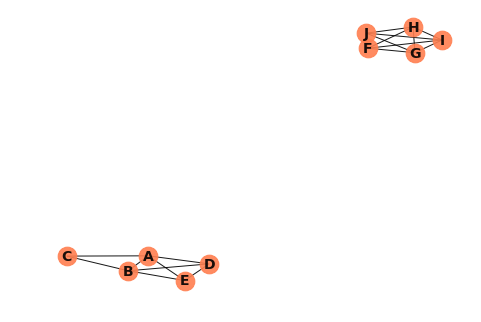

In [111]:
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

nx.draw(G,
        with_labels=True,
        node_color="coral",
        node_size=350,
        alpha=0.9,
        edge_color='black',
        linewidths=1,
        font_size=14,
        font_weight="bold"
       )